In [45]:
# Lets import all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [79]:
# Lets load the dataset
df = pd.read_csv('Netflix Movies.csv')
df.head()

,Title,Genre,Premiere,year,Runtime,IMDB Score,Language,show_id,type,director,country,rating
0,Dick Johnson Is Dead,Documentary,02-10-2020,2020,90,7.5,English,s1,Movie,Kirsten Johnson,United States,PG-13
1,Extraction,Action,24-04-2020,2020,117,6.7,English,s142,Movie,Steven C. Miller,"United States, United Kingdom, Canada",R
2,Prime Time,Thriller,14-04-2021,2021,91,5.7,Polish,s625,Movie,Jakub PiÄ…tek,other,TV-MA
3,Blue Miracle,Drama,27-05-2021,2021,95,6.7,English,s835,Movie,Julio Quintana,United States,TV-PG
4,Ghost Lab,Horror,26-05-2021,2021,117,5.2,Thai,s837,Movie,Paween Purijitpanya,Thailand,TV-MA


In [80]:
# make the movie title as index 
df = df.set_index('Title')
df.head()

,Genre,Premiere,year,Runtime,IMDB Score,Language,show_id,type,director,country,rating
Title,,,,,,,,,,,
Dick Johnson Is Dead,Documentary,02-10-2020,2020,90,7.5,English,s1,Movie,Kirsten Johnson,United States,PG-13
Extraction,Action,24-04-2020,2020,117,6.7,English,s142,Movie,Steven C. Miller,"United States, United Kingdom, Canada",R
Prime Time,Thriller,14-04-2021,2021,91,5.7,Polish,s625,Movie,Jakub PiÄ…tek,other,TV-MA
Blue Miracle,Drama,27-05-2021,2021,95,6.7,English,s835,Movie,Julio Quintana,United States,TV-PG
Ghost Lab,Horror,26-05-2021,2021,117,5.2,Thai,s837,Movie,Paween Purijitpanya,Thailand,TV-MA


In [81]:
#lets check the null valus of the dataset
df.isnull().sum()

Genre         0
Premiere      0
year          0
Runtime       0
IMDB Score    0
Language      0
show_id       0
type          0
director      0
country       0
rating        0
dtype: int64

In [82]:
df.describe()

,year,Runtime,IMDB Score
count,503.000000,503.000000,503.000000
mean,2018.946322,95.141153,6.197614
std,1.493379,25.825532,0.965642
min,2014.000000,4.000000,2.500000
25%,2018.000000,87.000000,5.600000
50%,2019.000000,97.000000,6.300000
75%,2020.000000,108.000000,6.900000
max,2021.000000,209.000000,9.000000


In [83]:
df.shape

(503, 11)

In [149]:
# Lets see the Movies Count per Genres
genres = df['Genre'].value_counts().head(10)
genres.reset_index()


,index,Genre
0,Documentary,127
1,Drama,71
2,Comedy,42
3,Romantic comedy,35
4,Thriller,33
5,Comedy-drama,13
6,Crime drama,10
7,Horror,9
8,Biopic,8
9,Action,7


Text(0, 0.5, 'Count of moives')

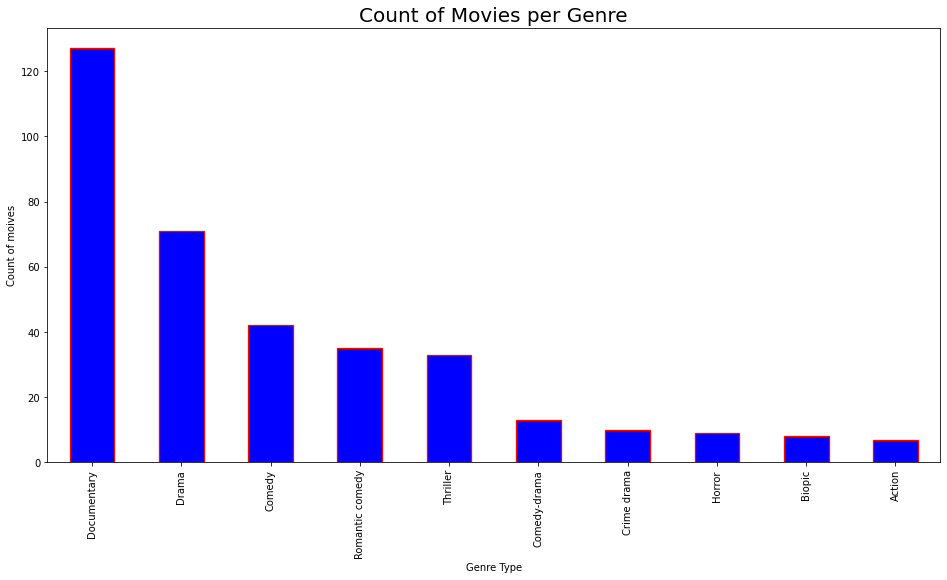

In [186]:
#Count of movies for top genres
genres.plot(kind='bar',x='index',y='Genre',color='blue',edgecolor='red',linewidth=1.3, figsize=(16,8))
plt.title('Count of Movies per Genre', fontsize=20)
plt.xlabel('Genre Type')
plt.ylabel('Count of moives')

[]

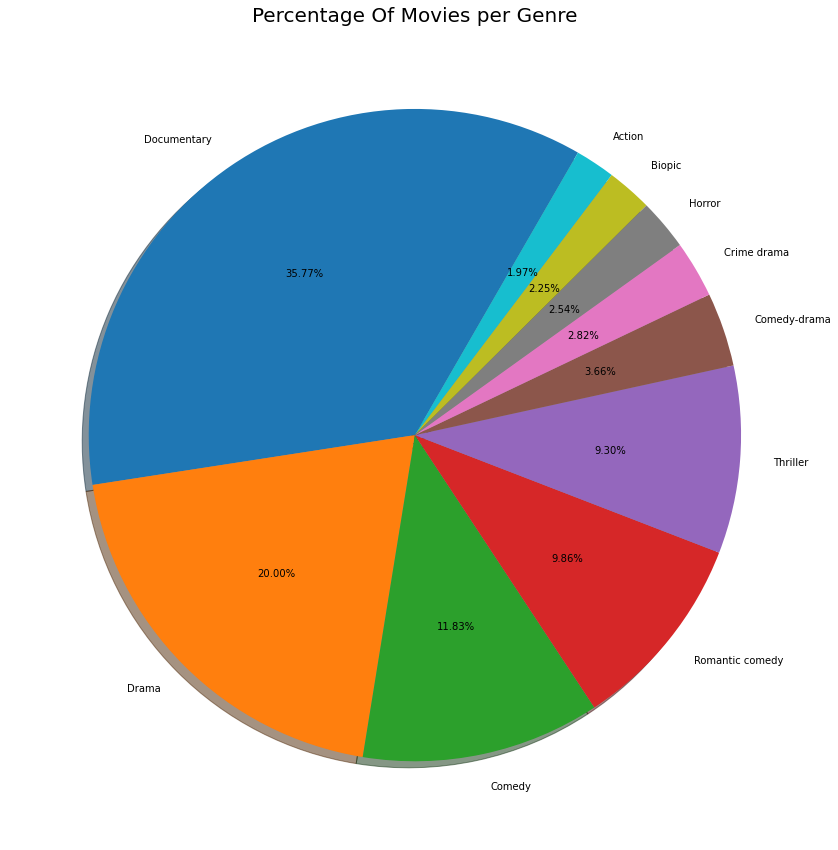

In [152]:
# Find the % of Moives in Top 10 genres
plt.figure(figsize=(15,15))
plt.pie(genres.values,labels=genres.index, labeldistance = 1.1, autopct='%1.2f%%', shadow=True, startangle=60)
plt.title('Percentage Of Movies per Genre', fontsize = 20)
plt.plot()

In [86]:
# Create a movie list with IMDB Rating, Genre, language
top_20 = df.groupby(by='Title').max()[['IMDB Score','Language','Premiere','Genre']].sort_values(by='IMDB Score',ascending=False).reset_index().head(20)
top_20

,Title,IMDB Score,Language,Premiere,Genre
0,David Attenborough: A Life on Our Planet,9.0,English,04-10-2020,Documentary
1,Springsteen on Broadway,8.5,English,16-12-2018,One-man show
2,Winter on Fire: Ukraine's Fight for Freedom,8.4,English/Ukranian/Russian,09-10-2015,Documentary
3,Dancing with the Birds,8.3,English,23-10-2019,Documentary
4,The Three Deaths of Marisela Escobedo,8.2,Spanish,14-10-2020,Documentary
5,Klaus,8.2,English,15-11-2019,Animation/Christmas/Comedy/Adventure
6,Seaspiracy,8.2,English,24-03-2021,Documentary
7,My Octopus Teacher,8.1,English,07-09-2020,Documentary
8,Rising Phoenix,8.1,English,26-08-2020,Documentary
9,The Ivory Game,7.9,English,04-11-2016,Documentary


[]

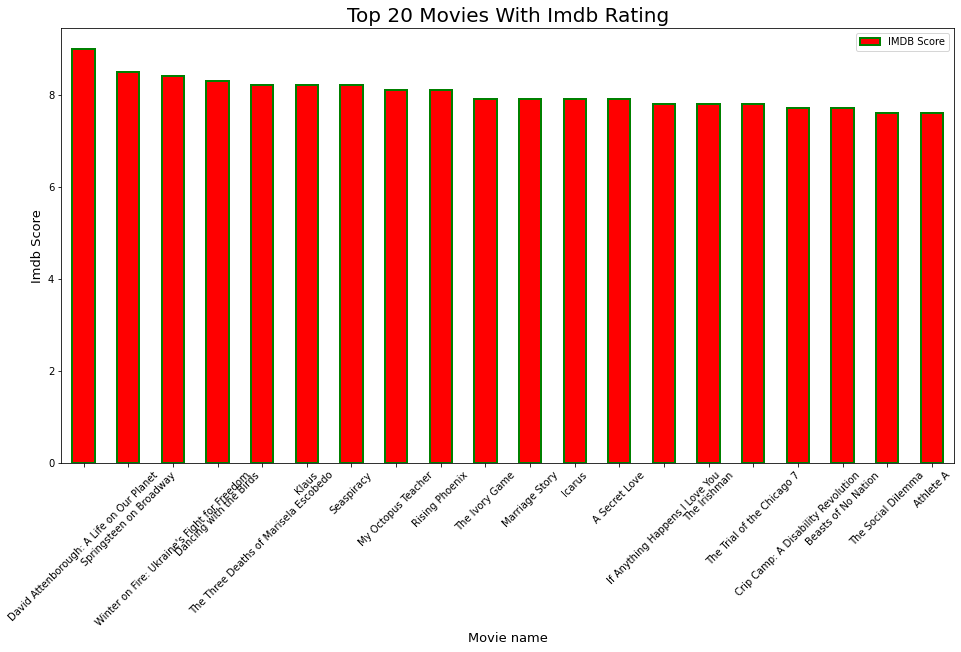

In [87]:
top_20.plot(kind='bar',x='Title',y='IMDB Score',color='red',linewidth=2,edgecolor='green',figsize=(16,8))
plt.title("Top 20 Movies With Imdb Rating",fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Movie name',fontsize=13)
plt.ylabel('Imdb Score',fontsize=13)
plt.plot()

In [104]:
# Movies released in year 
movie_counts = df['year'].value_counts().reset_index()
movie_counts

,index,year
0,2020,162
1,2019,105
2,2018,83
3,2021,62
4,2017,54
5,2016,27
6,2015,9
7,2014,1


Text(0, 0.5, 'Count of movie release')

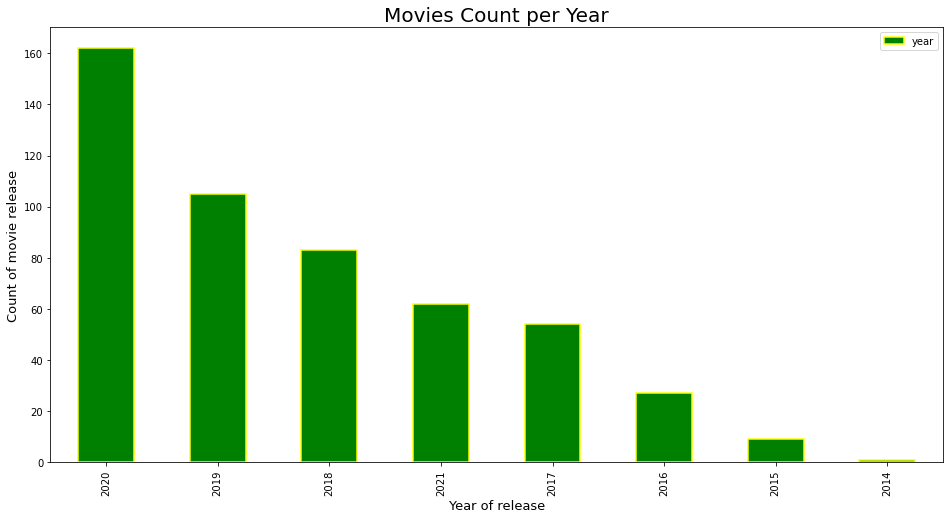

In [188]:
# presentation of above data
movie_conuts.plot(kind='bar',x='index',y='year',figsize=(16,8),color='green',edgecolor='yellow',linewidth=1.5)
plt.title('Movies Count per Year',fontsize=20)
plt.xlabel('Year of release',fontsize=13)
plt.ylabel('Count of movie release',fontsize=13)


In [130]:
# movues in different language
language = df['Language'].value_counts()
language = language.head(10)
language.reset_index()

,index,Language
0,English,345
1,Hindi,28
2,Spanish,25
3,French,18
4,Italian,14
5,Indonesian,9
6,Portuguese,9
7,English/Spanish,5
8,Japanese,5
9,Korean,5


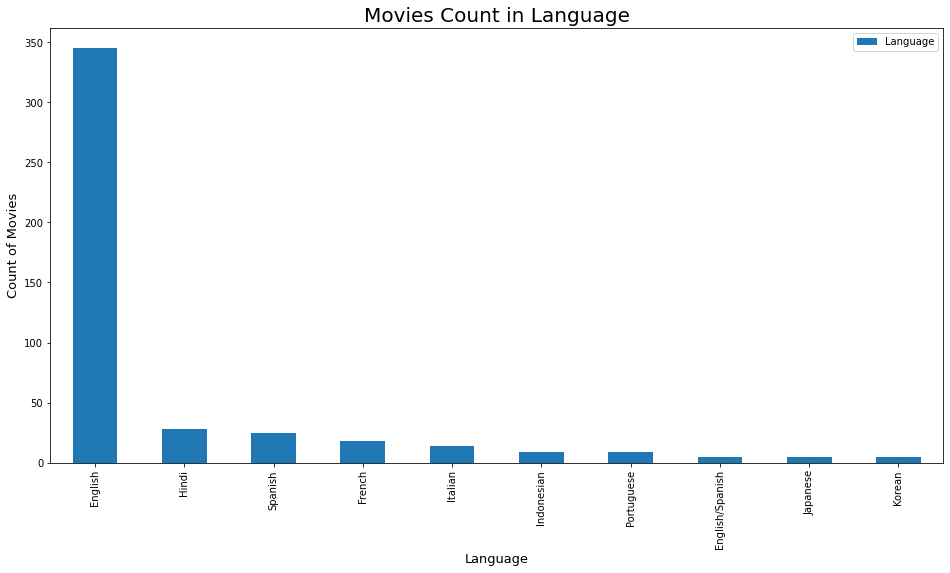

In [128]:
language.plot(kind='bar',x='index',y='Language',figsize=(16,8))
plt.title('Movies Count in Language',fontsize=20)
plt.xlabel('Language',fontsize=13)
plt.ylabel('Count of Movies',fontsize=13)
plt.show()

[]

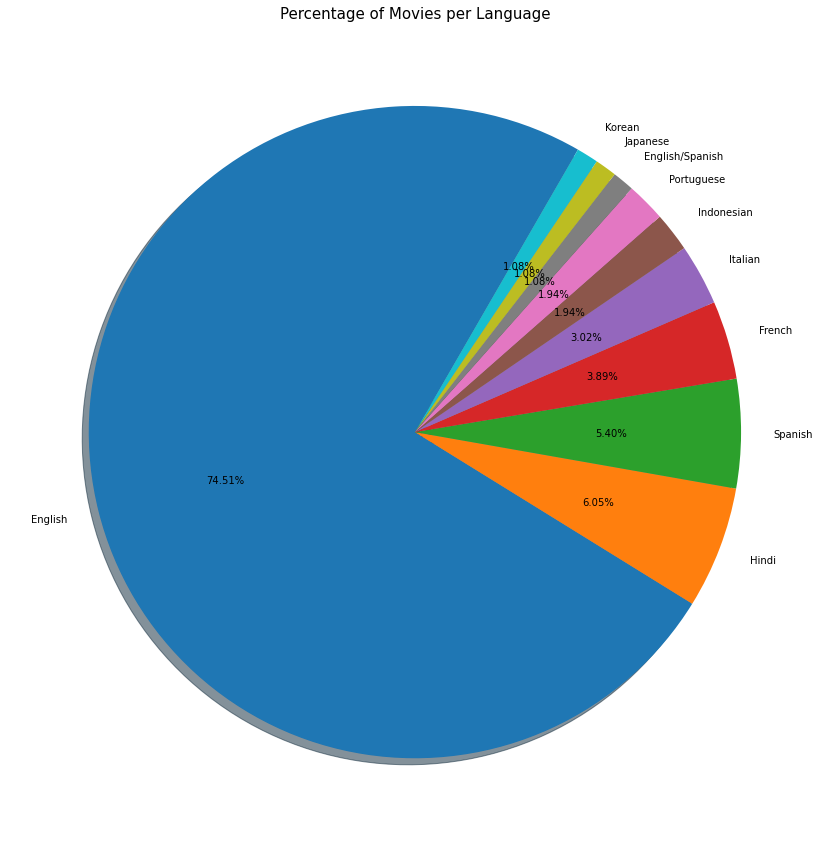

In [158]:
# % odf movies in languages
plt.figure(figsize=(15,15))
plt.pie(language.values,labels=language.index, labeldistance=1.1,autopct='%1.2f%%', shadow=True,startangle=60)
plt.title('Percentage of Movies per Language', fontsize =15)
plt.plot()

In [157]:
# list of movies in different nations
country_wise = df['country'].value_counts().head(10)
country_wise.reset_index()

,index,country
0,United States,267
1,India,34
2,other,14
3,United Kingdom,13
4,Italy,13
5,France,12
6,Spain,11
7,"United Kingdom, United States",9
8,Indonesia,8
9,Brazil,8


Text(0, 0.5, 'Count of movies')

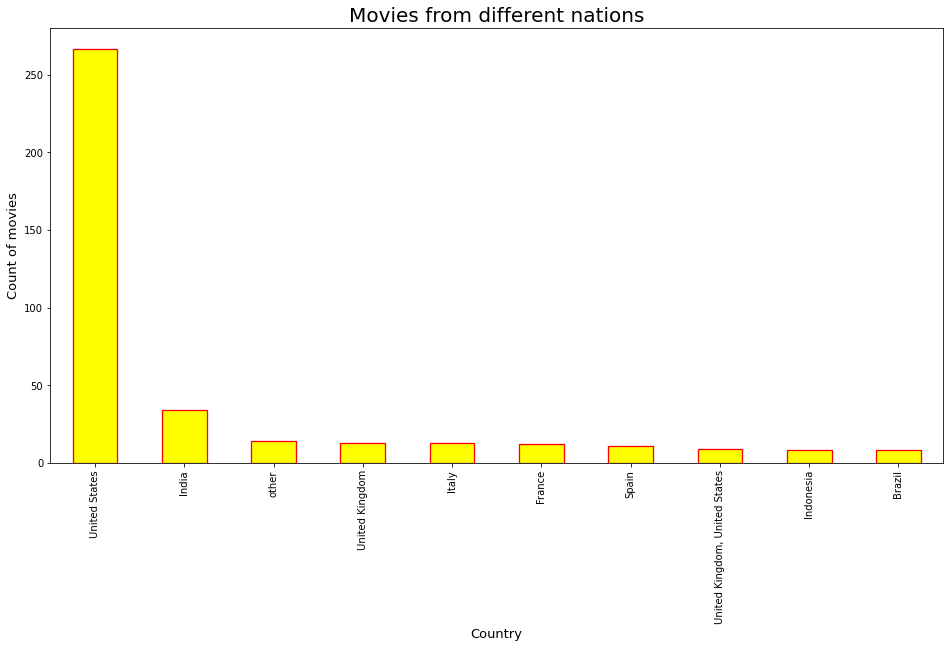

In [161]:
country_wise.plot(kind='bar',x='index',y='country',color='yellow',figsize=(16,8),linewidth=1.3,edgecolor='red')
plt.title('Movies from different nations',fontsize=20)
plt.xlabel('Country',fontsize=13)
plt.ylabel('Count of movies',fontsize=13)

In [168]:
# Top directors with title & Imdb score
top_director = df.groupby(by='Title').max()[['director','IMDB Score']].sort_values(by='IMDB Score',ascending=False).reset_index().head(20)
top_director

,Title,director,IMDB Score
0,David Attenborough: A Life on Our Planet,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",9.0
1,Springsteen on Broadway,Thom Zimny,8.5
2,Winter on Fire: Ukraine's Fight for Freedom,Evgeny Afineevsky,8.4
3,Dancing with the Birds,Huw Cordey,8.3
4,The Three Deaths of Marisela Escobedo,Carlos PÃ©rez Osorio,8.2
5,Klaus,Sergio Pablos,8.2
6,Seaspiracy,Ali Tabrizi,8.2
7,My Octopus Teacher,"Pippa Ehrlich, James Reed",8.1
8,Rising Phoenix,other,8.1
9,The Ivory Game,"Kief Davidson, Richard Ladkani",7.9


In [170]:
# Count of movies per rating
rate = df['rating'].value_counts()
rate.reset_index()

,index,rating
0,TV-MA,253
1,TV-14,90
2,TV-PG,55
3,R,46
4,PG-13,23
5,TV-G,15
6,PG,11
7,TV-Y7,5
8,TV-Y,5


Text(0, 0.5, 'Count of movies')

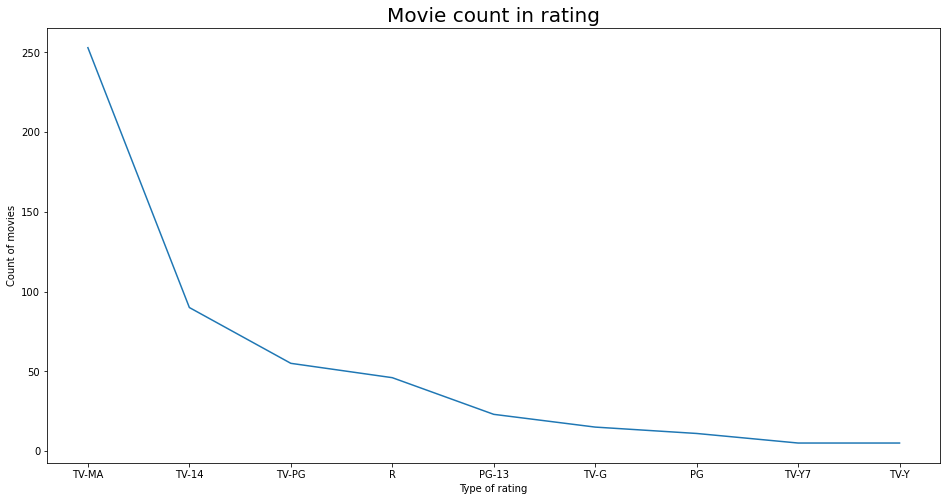

In [174]:
rate.plot(kind='line',figsize=(16,8))
plt.title('Movie count in rating', fontsize=20)
plt.xlabel('Type of rating')
plt.ylabel('Count of movies')

In [176]:
# movies with highest runtime/watchtime
movie_runtime = df.groupby(by='Title').max()['Runtime'].sort_values(ascending=False).head(10)
movie_runtime.reset_index()

,Title,Runtime
0,The Irishman,209
1,Da 5 Bloods,155
2,Springsteen on Broadway,153
3,Citation,151
4,The Forest of Love,151
5,Ludo,149
6,Raat Akeli Hai,149
7,The Last Days of American Crime,149
8,Army of the Dead,148
9,Drive,147


Text(0, 0.5, 'Runtime')

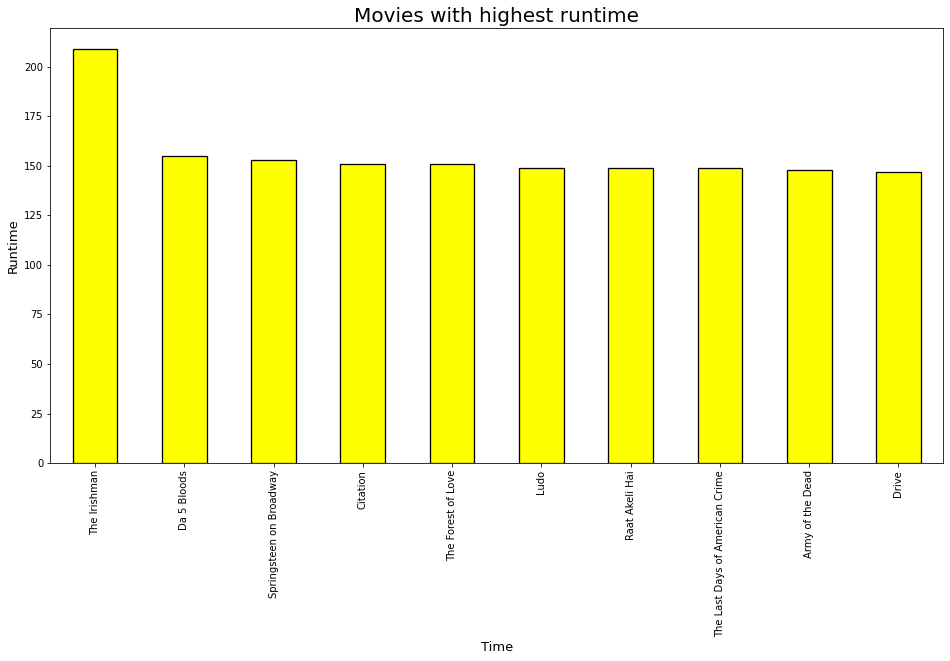

In [183]:
movie_runtime.plot(kind='bar',x='Title',y='Runtime',color='yellow',edgecolor='black',linewidth=1.3,figsize=(16,8))
plt.title('Movies with highest runtime',fontsize=20)
plt.xlabel('Time',fontsize=13)
plt.ylabel('Runtime',fontsize=13)